In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### import the data

In [2]:
data=pd.read_csv("merged_file.csv")

/Users/miaoxuanzhang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unnamed: 0,reviewID,overall,verified,reviewTime,reviewerID,productID,reviewText,summary,vote,...,category,title,brand,rank,main_cat,description,also_buy,also_view,feature,numberOfReviews
0,0,0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,0,...,"['Video Games', 'PC', 'Games']",Anno 2070,Ubisoft,">#30,230 in Video Games (See Top 100 in Video ...",Video Games,['ANNO 2070BRAND NEW - IN STOCKDVD Rom Softwar...,NaN,"['B013F0IP1C', 'B00JDP1AWU', 'B00XR3YC2E', 'B0...",['A new era: while adhering to the fundamental...,13
1,1,1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",0,...,"['Video Games', 'PC', 'Games']",Anno 2070,Ubisoft,">#30,230 in Video Games (See Top 100 in Video ...",Video Games,['ANNO 2070BRAND NEW - IN STOCKDVD Rom Softwar...,NaN,"['B013F0IP1C', 'B00JDP1AWU', 'B00XR3YC2E', 'B0...",['A new era: while adhering to the fundamental...,13
2,2,2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game.,Three Stars,0,...,"['Video Games', 'PC', 'Games']",Anno 2070,Ubisoft,">#30,230 in Video Games (See Top 100 in Video ...",Video Games,['ANNO 2070BRAND NEW - IN STOCKDVD Rom Softwar...,NaN,"['B013F0IP1C', 'B00JDP1AWU', 'B00XR3YC2E', 'B0...",['A new era: while adhering to the fundamental...,13
3,3,3,2,True,2015-02-20,A2204E1TH211HT,0700026657,"found the game a bit too complicated, not what...",Two Stars,0,...,"['Video Games', 'PC', 'Games']",Anno 2070,Ubisoft,">#30,230 in Video Games (See Top 100 in Video ...",Video Games,['ANNO 2070BRAND NEW - IN STOCKDVD Rom Softwar...,NaN,"['B013F0IP1C', 'B00JDP1AWU', 'B00XR3YC2E', 'B0...",['A new era: while adhering to the fundamental...,13
4,4,4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,"great game, I love it and have played it since...",love this game,0,...,"['Video Games', 'PC', 'Games']",Anno 2070,Ubisoft,">#30,230 in Video Games (See Top 100 in Video ...",Video Games,['ANNO 2070BRAND NEW - IN STOCKDVD Rom Softwar...,NaN,"['B013F0IP1C', 'B00JDP1AWU', 'B00XR3YC2E', 'B0...",['A new era: while adhering to the fundamental...,13


### Extract columns needed

In [9]:
df=data[["reviewID", "reviewTime","reviewerID", "productID","overall", "title"]]

In [10]:
df.head()

,reviewID,reviewTime,reviewerID,productID,overall,title
0,0,2015-10-17,A1HP7NVNPFMA4N,0700026657,5,Anno 2070
1,1,2015-07-27,A1JGAP0185YJI6,0700026657,4,Anno 2070
2,2,2015-02-23,A1YJWEXHQBWK2B,0700026657,3,Anno 2070
3,3,2015-02-20,A2204E1TH211HT,0700026657,2,Anno 2070
4,4,2014-12-25,A2RF5B5H74JLPE,0700026657,5,Anno 2070


In [12]:
df["overall"].describe()

count    497577.000000
mean          4.220456
std           1.185424
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

Average rating is 4.22

# A Simple User based CF---Pearson correlation on ratings to compare similarities

### Preparation (Ratings table and game_matrix)

In [20]:
#Create a new dataframe called ratings grouped by product ID and calculated the average rating per each product ID
ratings = pd.DataFrame(df.groupby('productID')['overall'].mean())
ratings.head()

,overall
productID,
0700026398,3.125000
0700026657,3.692308
0700099867,3.300000
0804161380,4.816327
3828770193,4.333333


In [21]:
#Add number of ratings per each product ID
ratings['number_of_ratings'] = df.groupby('productID')['overall'].count()
ratings.head()

,overall,number_of_ratings
productID,,
0700026398,3.125000,8
0700026657,3.692308,13
0700099867,3.300000,30
0804161380,4.816327,49
3828770193,4.333333,6


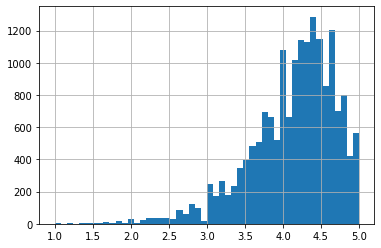

In [29]:
#Now make a plot to visualize average ratings
%matplotlib inline 
#makes your plot outputs appear and be stored within the notebook
ratings['overall'].hist(bins=50)

We can see that most movie ratings are between 3.5 and 5.

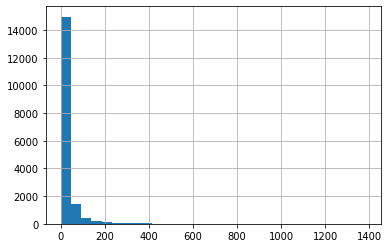

In [32]:
#Visualize number of ratings
ratings['number_of_ratings'].hist(bins=30)

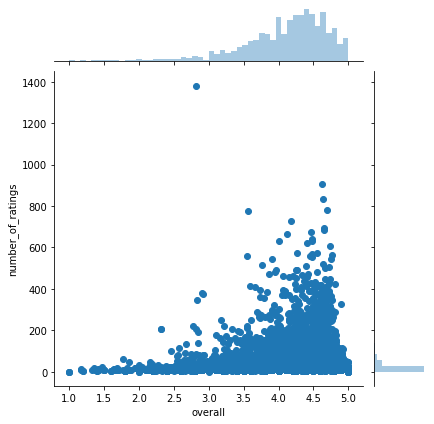

In [34]:
#Now let us check the relationship between the ratings of a product and the number of ratings
sns.jointplot(x='overall', y='number_of_ratings', data=ratings)

As number of ratings increases, we see the overall ratings tend to increase as well---small positive relationship observed.

In [64]:
#Build a matrix between reviewerID and productID
game_matrix = df.pivot_table(index='reviewerID', columns='productID', values='overall')
game_matrix.head()

productID,0700026398,0700026657,0700099867,0804161380,3828770193,6050036071,7293000936,7544256944,8176503290,8565000168,...,B01HD1B76O,B01HD2TECW,B01HDJFJKG,B01HDJFJLK,B01HDJFJOM,B01HFRICLE,B01HGPUTCA,B01HH6JEOC,B01HIZF7XE,B01HIZGKOE
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0059486XI1Z0P98KP35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0220159ZRNBTRKLG08H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0266076X6KPZ6CCHGVS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0277912HT4JSJKVSL3E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A02836981FYG9912C66F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Find top 10 productIDs with most number of ratings
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,overall,number_of_ratings
productID,,
B00178630A,2.824765,1381
B000ZK9QCS,4.627624,905
B000XJNTNS,4.631894,834
B00JK00S0S,4.690932,783
B000ZKA0J6,3.560724,774
B0012N94WO,4.174931,726
B003ZSP0WW,4.651297,694
B00GODZYNA,4.644737,684
B000ZK7ZOE,4.461424,674


### Let us do a recommendation system test on one product

In [41]:
#Let us check the product with the largest number of ratings
B00178630A_user_rating=game_matrix['B00178630A']
B00178630A_user_rating.head()

reviewerID
A0059486XI1Z0P98KP35   NaN
A0220159ZRNBTRKLG08H   NaN
A0266076X6KPZ6CCHGVS   NaN
A0277912HT4JSJKVSL3E   NaN
A02836981FYG9912C66F   NaN
Name: B00178630A, dtype: float64

In [42]:
#Let us compare correlation between those two products
similar_to_B00178630A=game_matrix.corrwith(B00178630A_user_rating)

/Users/miaoxuanzhang/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/miaoxuanzhang/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [52]:
similar_to_B00178630A.sort_values(ascending=False)

productID
B00KWF366S    1.0
B000V9C9FO    1.0
B000HKKM2Y    1.0
B000IN0BSU    1.0
B0064TYRAU    1.0
             ... 
B01HFRICLE    NaN
B01HGPUTCA    NaN
B01HH6JEOC    NaN
B01HIZF7XE    NaN
B01HIZGKOE    NaN
Length: 17408, dtype: float64

We can see some strong correlations from above.

In [55]:
similar_to_B00178630A.describe()

count    918.000000
mean       0.249138
std        0.752845
min       -1.000000
25%       -0.413403
50%        0.500000
75%        1.000000
max        1.000000
dtype: float64

25% of other products are perfectly correlated with B00178630A. Probably because this game got a lot of ratings.

In [59]:
#Make similar_to_B00178630A looks better
corr_B00178630A = pd.DataFrame(similar_to_B00178630A, columns=['Correlation'])
corr_B00178630A.dropna(inplace=True)
corr_B00178630A.head()

,Correlation
productID,
0700099867,0.500000
B00000F1GM,-1.000000
B00001IVRD,0.353553
B00001LCDM,1.000000
B00001OWYW,-0.693375


In [60]:
#Add number of ratings to this correlation based dataframe
corr_B00178630A = corr_B00178630A.join(ratings['number_of_ratings'])
corr_B00178630A.head()

,Correlation,number_of_ratings
productID,,
0700099867,0.500000,30
B00000F1GM,-1.000000,172
B00001IVRD,0.353553,113
B00001LCDM,1.000000,10
B00001OWYW,-0.693375,75


In [62]:
#Limit products and only keep products with number of ratings >50 and view the top 10
corr_B00178630A[corr_B00178630A['number_of_ratings'] > 50].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
productID,,
B007VJ06Q6,1.0,69
B003O6JKLC,1.0,176
B0012N5MUC,1.0,102
B002BSA298,1.0,159
B00BBUCCKO,1.0,93
B00JUFT1E2,1.0,63
B0002Y2XXQ,1.0,91
B00D6PTMB4,1.0,90
B002Q8IHDQ,1.0,70


### Let us now build a recommendation system function in order to generalize

In [67]:
def user_based_CF(productID, number_of_ratings):
    user_rating=game_matrix[productID]
    similar_to=game_matrix.corrwith(user_rating)
    corr = pd.DataFrame(similar_to, columns=['Correlation'])
    corr.dropna(inplace=True)
    corr = corr.join(ratings['number_of_ratings'])
    return corr[corr['number_of_ratings'] > number_of_ratings].sort_values(by='Correlation', ascending=False).head(10)

In [68]:
#Test
user_based_CF("B00001OWYW", 100)

,Correlation,number_of_ratings
productID,,
B00000DMB3,1.0,192
B003ZHMMEM,1.0,247
B0009VXBAQ,1.0,629
B000UW21A0,1.0,423
B000XJNTNS,1.0,834
B001TOQ8UW,1.0,107
B00004SVV9,1.0,128
B001HWB68K,1.0,274
B00009WNZA,1.0,114
